In [1]:
import quickage
import warnings
warnings.filterwarnings("ignore")

In [2]:
folder='/users/caganze/research/j1624/data/'
filename=folder+'/example_quickage.jpeg'
filename_galah=folder+'/example_quickage_galah.jpeg'

In [3]:
#res=quickage.estimate_age(sourc, metal, use_jz=True, nsigma=1, plot=True, file_plot=filename)

In [4]:
#check for these properties
#FeH = -0.38±0.07
#RV = +15±6 km/s (no Keck, could get with NIRSPEC)
#Gaia EDR: 
#π = 17.985±0.041 mas
#µra = 226.011±0.052 mas/yr
#µdec = -336.242±0.035 mas/yr

import astropy.coordinates as astro_coord
import astropy.units as u

c = astro_coord.SkyCoord('00:35:13.45 -03:22:19.50', unit=(u.hourangle, u.deg))


In [5]:
import numpy as np
p=np.random.normal(17.985, 0.041, 1000)
np.nanmedian(1000/p), np.nanstd(1000/p)

(55.60715885394794, 0.1268139448691533)

In [6]:
sourc={'ra':c.ra.to(u.degree).value, \
        'dec': c.dec.to(u.degree).value,\
        'pmra':(226.011, 0.052),
        'pmdec':(-336.242, 0.035),
        'distance':(np.nanmedian(1000/p), np.nanstd(1000/p)),
        'rv': (15, 6)}
metal=(-0.,39, 0.07)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 


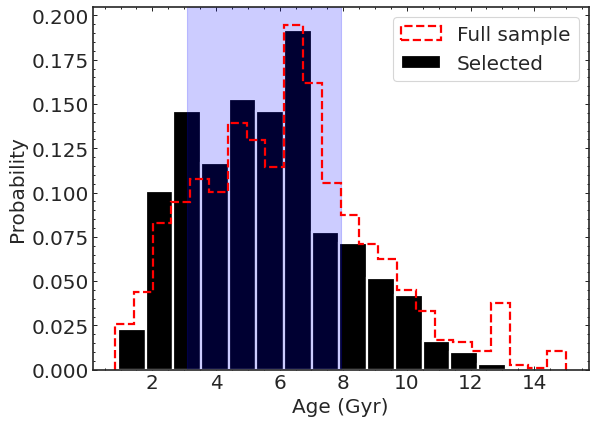

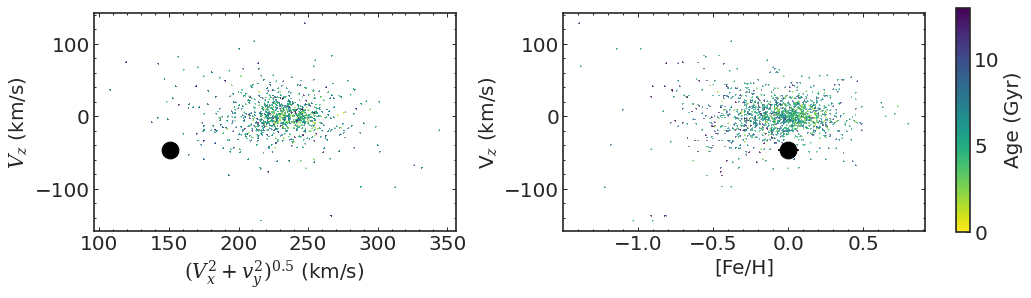

In [7]:
#use bensby, luck, casagrande et al. sample
res=quickage.estimate_age(sourc, metal, nsigma=1, use_jz=False, plot=True, file_plot=filename)

In [8]:
res['median_age'], res['std_age']

(5.4, (2.3000000000000003, 2.541599999999999))

IsochronePotential
(834, 1000)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:57<00:00,  2.80it/s]


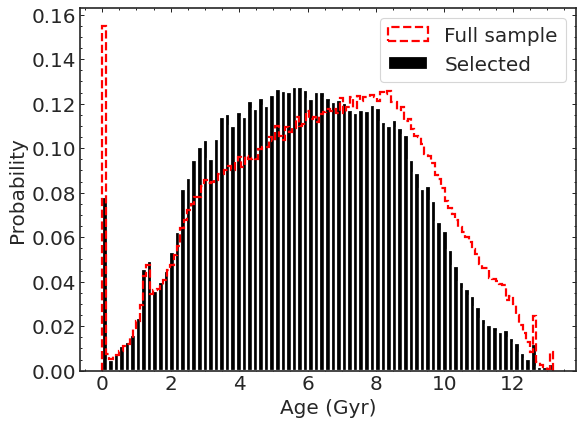

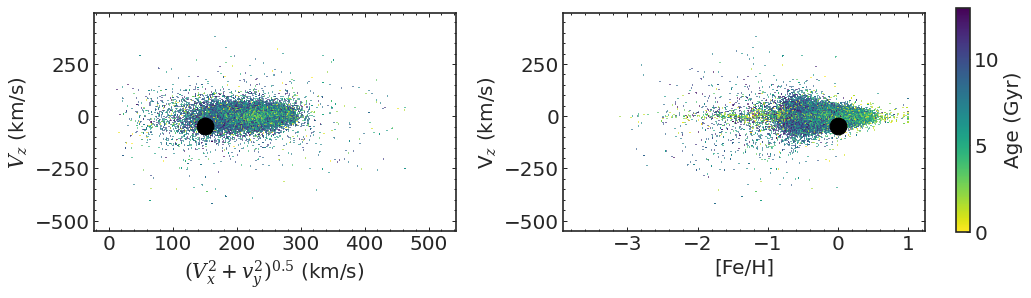

In [9]:
#use galah sample (no citation for this)
res=quickage.estimate_age(sourc, metal, nsigma=1,  use_galah=True, use_jz=True, plot=True, file_plot=filename_galah)

In [10]:
res['median_age'], res['std_age']

(6.010542526068926, 2.8565493907413537, 2.8939407013552803)

IsochronePotential
(834, 1434)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1434/1434 [08:19<00:00,  2.87it/s]


IsochronePotential
(834, 1000)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:49<00:00,  2.86it/s]


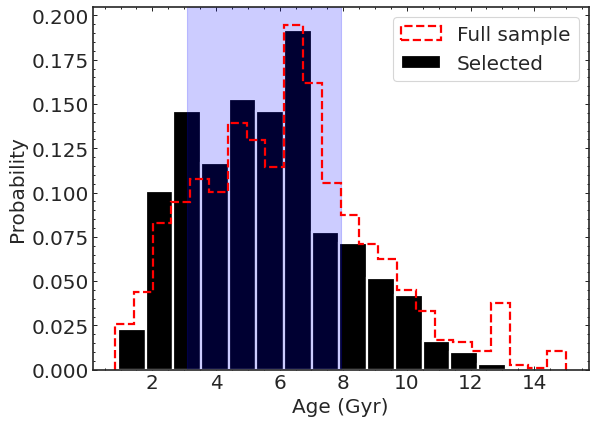

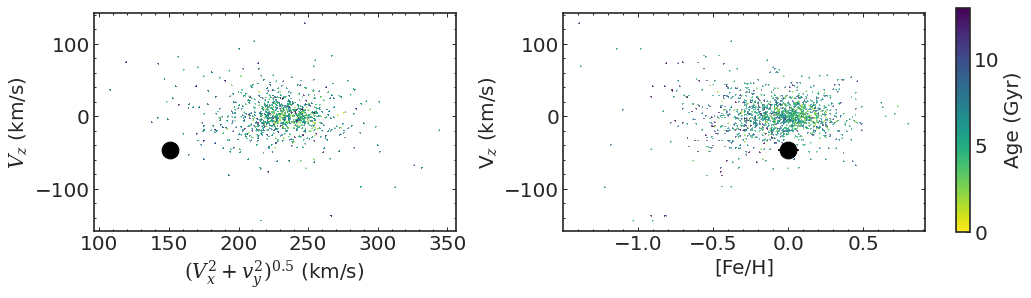

In [11]:
res=quickage.estimate_age(sourc, metal, use_jz=True, nsigma=1, plot=True, file_plot=filename)

In [12]:
res['median_age'], res['std_age']

(5.4, (2.3000000000000003, 2.541599999999999))

In [14]:
#res